- Họ và tên: Phạm Trần Yến Quyên
- MSSV: 22127357
- Lớp: 22CLC02

# PROJECT 5 - LINEAR REGRESSION
### **Chủ đề**: Xây dựng mô hình đánh giá chất lượng rượu sử dụng phương pháp hồi quy tuyến tính từ database 'wine.csv'.
- Các mô hình được xây dựng dựa trên 3 phương pháp:
    1. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.
    2. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.
    3. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.

### **Các quy trình/Chức năng**:
- Để xây dựng một mô hình hồi quy tuyến tính, cần tiến hành các bước cụ thể như sau:
1. Xử lý và chuyển hóa dữ liệu để thu thập số liệu và 11 đặc tính ảnh hưởng tới `quality` của
rượu thông qua hàm `train_test_split(df, test_size)`, các biến global:
    + Kiểm tra thông tin của dữ liệu: Kiểm tra số feature, có `null` hay không,...
    + Chia tập dữ liệu train/test phục vụ cho việc tính toán số liệu đánh giá.
2. Xây dựng mô hình hồi quy tuyến tính thông qua class `LinearRegressionModel`. Trong đó:
    + Sử dụng công thức hồi quy tuyến tính cho cả 3 yêu cầu: $\hat{y} = θ_0 + θ_1*x_1 +...+ θ_n*x_n$
    + Sử dụng phương pháp **Foward Selection** để tìm tổ hợp các features (đặc tính) tốt nhất cho yêu cầu **3.**
3. Đánh giá mô hình dựa trên 2 thông số:
    + Mean Squared Error (MSE).
    + $R^2$ Adjusted Score.
4. Vẽ biểu đồ và trình bày ý nghĩa.
> **LƯU Ý**: Có sử dụng thư viện `pandas` và `matplotlib` hỗ trợ quá trình sử dụng database và mô tả.


# == DATABASE PREP ==
### **Nhập và kiểm tra database**:
- **Mục đích**: Nhập và tạo Dataframe để dùng/xử lý/xây model, ngoài ra trước khi tiến hành xây model thì phải kiểm tra xem dataframe có bị các lỗi (khác định dạng, có null value,...) để xử lý tránh gây lỗi.
- Bao gồm:
    + `df = pd.read_csv('wine.csv', sep=';')`: Đọc và sparse dữ liệu (nhận biết bằng ***';'***) thành một Dataframe 12 cột (12 features) với 1199 entries (số giá trị mỗi feature).
    + `df.info()`: Kiểm tra thông tin cơ bản của dữ liệu (để check xem có dữ liệu nào thiếu không, kiểu dữ liệu của các cột,...)

### **Cấu trúc Dataframe**: Trong file dữ liệu ’wine.csv’ bao gồm 1200 mẫu rượu vang, mỗi mẫu có 11 đặc tính và một nhãn `quality` được đánh giá trên thang điểm từ 1 đến 10. Các đặc trưng bao gồm:
    + Fixed Acidity
    + Volatile Acidity
    + Citric Acid
    + Residual Sugar
    + Chlorides
    + Free Sulfur Dioxide
    + Total Sulfur Dioxide
    + Density
    + pH
    + Sulphates
    + Alcohol
- *Trong đó:*
> **quality** = $x_0 + x_1 *$ fixed_acidity $+ x_2 *$ volatile_acidity $+ x_3 *$ citric_acid $+ x_4 *$ residual_sugar $+ x_5 *$ chlorides $+ x_6 *$ free_sulfur_dioxide $+ x_7 *$ total_sulfur_dioxide $+ x_8 *$ density $+ x_9 *$ pH $+ x_{10} *$ sulphates $+ x_{11} *$ alcohol.    

### **Chia tập train-test**:
- **Mục đích**:
    + Vì ở phần sau sẽ sử dụng Mean Squared Error (MSE) để đánh giá mô hình nên cần chia dữ liệu thành tập train/test để tránh các vấn đề như overfitting/underfitting/...cũng như giúp model được đánh giá chính xác hiệu suất trên dữ liệu chưa thấy, tránh việc mô hình quá khớp với dữ liệu train.
        + Tập train: Dùng để train mô hình.
        + Tập test: Dùng để kiểm tra mô hình đã train xong có tốt không.

### **Quy trình chia tập dữ liệu**:
#### Lấy mẫu cho tập train:
- Dữ liệu được chia theo tỉ lệ 80% train - 20% test (Chọn ngẫu nhiên các dòng trong
dữ liệu để tạo thành tập train và test) dựa trên nghiên cứu về cách chia tỉ lệ cho ra
kết quả tốt nhất cho linear regression model trong machine learning (Tham khảo
link tại mục **REFERENCES**):
    + `df.sample(frac=1 - test_size, random_state=42)`: Hàm sample của pandas được sử dụng để lấy mẫu ngẫu nhiên các dòng từ dataframe của dữ liệu (`df`). Tham số `frac=1 - test_size` xác định tỷ lệ của tập train so với toàn bộ tập dữ liệu. Vì tỷ lệ của tập test được truyền vào bằng tham sô `test_size=0.2`, tỷ lệ tập train sẽ là 0.8 (100% - 20% = 80%).
    + `random_state=42`: Đảm bảo rằng kết quả lấy mẫu có thể tái lập được. Khi sử
dụng cùng một số `random_state` sẽ cho kết quả giống nhau mỗi lần xây model.
> **LƯU Ý**: Vì giới hạn thư viện, data split không được stratify (Chia dữ liệu sao cho tỉ lệ các lớp trong tập train và test giống nhau (để tránh trường hợp một lớp bị thiếu trong tập train/test)) có thể dẫn đến bias giữa các tập nên bài làm chỉ thực hiện trên `random_state=42` (default shuffled state).

- Tạo tập test:
    + `df.drop(train.index)`: Sau khi đã tạo tập train, các dòng này được loại bỏ khỏi dataframe dữ liệu để tạo ra tập test.
#### Từ dataframe, trích ra Biến độc lập (biến đầu vào) và Biến phụ thuộc (biến mục tiêu) cho cả tập train và tập test.
> `X_train = train_df.drop('quality', axis=1)` <br>
> `y_train = train_df['quality']` <br>
> `X_test = test_df.drop('quality', axis=1)` <br>
> `y_test = test_df['quality']`
- Trong đó:
    + Biến độc lập ($X$):
        + `X_train = train_df.drop(’quality’, axis=1)`: Tạo tập biến độc lập cho tập train bằng cách loại bỏ cột `quality` khỏi `train_df`.
        + `X_test = test_df.drop(’quality’, axis=1)`: Tương tự, tạo tập biến độc lập cho tập test từ `test_df`.
    + Biến phụ thuộc ($y$):
        + `y_train = train_df[’quality’]`: Tạo tập biến phụ thuộc cho tập train bằng cách lấy cột `quality` từ `train_df`.
        + `y_test = test_df[’quality’]`: Tương tự, tạo tập biến phụ thuộc cho tập test từ `test_df`.

In [18]:
import pandas as pd
# Đọc dữ liệu
df = pd.read_csv('wine.csv', sep=';') # sep=';' để phân biệt các cột trong file csv
"""df.info() # Kiểm tra thông tin cơ bản của dữ liệu (để check xem có dữ liệu nào thiếu không, kiểu dữ liệu của các cột, ...) """

# Chia dữ liệu thành tập train/test phục vụ cho việc train vs test mô hình.
# Tỉ lệ mặc định là 80% train và 20% test vì là tỉ lệ cho ra kết quả tốt nhất
def train_test_split(df, test_size): # Cách làm tham khảo: https://www.geeksforgeeks.org/how-to-split-data-into-training-and-testing-in-python-without-sklearn/
    train = df.sample(frac=1-test_size, random_state=42) # random_state để cố định kết quả mỗi lần chạy (nếu không có thì mỗi lần chạy sẽ cho ra kết quả khác nhau)
    test = df.drop(train.index) # Loại bỏ các dòng đã chọn vào tập train để lấy tập test
    return train, test

train_df, test_df = train_test_split(df, test_size=0.2)

X_train = train_df.drop('quality', axis=1)
y_train = train_df['quality']
X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']

# == Class `matrix` ==
### **Mục đích**: Hỗ trợ quá trình tạo model (chuyển vị, nghịch đảo, in ra để debug nếu có vấn đề).
### **Chức năng các hàm**:
- `__init__`: Khởi tạo một ma trận (dưới dạng list các list).
- `gauss_jordan_inverse`:
    + Tạo ma trận đơn vị: Tạo một ma trận đơn vị cùng kích thước với ma trận ban đầu.
    + Chuyển ma trận về dạng tam giác:
        + Tìm hàng có phần tử lớn nhất ở cột hiện tại để giảm thiểu sai số tính toán (còn gọi là pivoting).
        + Đổi hàng hiện tại với hàng có phần tử lớn nhất.
        + Loại bỏ các phần tử khác ngoài đường chéo chính.
    + Chuẩn hóa các hàng: Đưa các phần tử trên đường chéo chính về 1 và cập nhật các phần tử khác tương ứng.
    + Trả về: Ma trận nghịch đảo hoặc `None` nếu ma trận không khả nghịch.
- `transpose`: 
    + Chuyển vị của ma trận bằng cách đổi vị trí các phần tử từ hàng thành cột và ngược lại.
    + Trả về: Ma trận chuyển vị của ma trận gốc.
- `print_matrix`: 
    + In ma trận: In ma trận theo định dạng dễ đọc.
    + Kiểm tra kiểu dữ liệu: Nếu bất kỳ phần tử nào trong ma trận là chuỗi (sử dụng để trả lỗi như không khả nghịch,...), in ra message lỗi đó nếu có.

In [19]:
class matrix:
    def __init__(self, matrix):
        self.matrix = matrix
    
    # Viết lại Gauss Jordan Inverse do ở W3 có ép kiểu gây lỗi sai số
    def gauss_jordan_inverse(self):
        n = len(self.matrix)
        # Tạo ma trận đơn vị
        inverse = [[0 for i in range(n)] for j in range(n)]
        for i in range(n):
            inverse[i][i] = 1

        # Chuyển ma trận về dạng tam giác
        for i in range(n):
            # Tìm hàng có phần tử lớn nhất ở cột i
            max_row = i
            for j in range(i + 1, n):
                if abs(self.matrix[j][i]) > abs(self.matrix[max_row][i]):
                    max_row = j
            
            # Kiểm tra xem phần tử lớn nhất có bằng 0 không
            if abs(self.matrix[max_row][i]) < 1e-10: # Dự trù cho floating point error
                return None
            
            # Đổi hàng i và hàng max_row
            self.matrix[i], self.matrix[max_row] = self.matrix[max_row], self.matrix[i]
            inverse[i], inverse[max_row] = inverse[max_row], inverse[i]

            # Chuyển phần tử ở cột i của các hàng khác về 0
            for j in range(n):
                if i != j: 
                    ratio = self.matrix[j][i] / self.matrix[i][i]
                    for k in range(n):
                        self.matrix[j][k] -= ratio * self.matrix[i][k] 
                        inverse[j][k] -= ratio * inverse[i][k]

        # Chuyển các hàng về 1
        for i in range(n):
            ratio = self.matrix[i][i]
            for j in range(n):
                self.matrix[i][j] /= ratio
                inverse[i][j] /= ratio
        return inverse
    
    def transpose(self):
        # Chuyển vị ma trận
        return [[self.matrix[j][i] for j in range(len(self.matrix))] for i in range(len(self.matrix[0]))]
        
    def print_matrix(self):
        # In lại ma trận để thoát format
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                # Kiểm tra có phải là chữ không
                if type(self.matrix[i][j]) == str:
                    for k in range(len(self.matrix)):
                        for l in range(len(self.matrix[0])):
                            print(self.matrix[k][l], end = '')
                    return
                if j == 0:
                    print("[", end = '')
                print(self.matrix[i][j], end = '')
                if j == len(self.matrix[0]) - 1:
                    print("]")
                else:
                    print(", ", end = '')

# == Class `LinearRegressionModel` ==
### Mô hình hồi quy tuyến tính:
$$\hat{y} = θ_0 + θ_1*x_1 +...+ θ_n*x_n$$
- Áp dụng vào dữ liệu thu được, ta có: 
> **quality** = $x_0 + x_1 *$ fixed_acidity $+ x_2 *$ volatile_acidity $+ x_3 *$ citric_acid $+ x_4 *$ residual_sugar $+ x_5 *$ chlorides $+ x_6 *$ free_sulfur_dioxide $+ x_7 *$ total_sulfur_dioxide $+ x_8 *$ density $+ x_9 *$ pH $+ x_{10} *$ sulphates $+ x_{11} *$ alcohol.  

### **Mục đích**: Xây dựng một mô hình hồi quy tuyến tính, bao gồm huấn luyện mô hình (fit), dự đoán (predict), tính toán thông số đánh giá MSE, $R^2$, và lựa chọn đặc trưng tốt nhất bằng Forward Selection. 
### **Chức năng các hàm**:
- `__init__`: Khởi tạo một Object mô hình hồi quy tuyến tính (tượng trưng cho 1 model). Object giữ 2 giá trị sau:
    + `self.coef_`: Danh sách các hệ số hồi quy của các feature.
    + `self.intercept_`: Hệ số tự do (bias) của mô hình.

- `fit(X,y)`: Huấn luyện mô hình bằng cách tìm các hệ số hồi quy và hệ số tự do thông qua công thức: $$\hat{x} = (X^{T}X)^{-1}X^{T}y$$
    + Các bước thực hiện:
        + Trích ma trận $X$ (chỉ không có cột `quality`) và vector $y$ (chỉ cột `quality`) từ dataframe gốc.
        + Thêm cột `intercept` vào $X$ : là bias với giá trị tất cả là 1 (hệ số tự do - hay $x_0$)
        + Chuyển đổi $X$ và $y$ thành dạng ma trận (list → Object `matrix` để sử dụng các hàm bên trên).
        + Tính ma trận chuyển vị của $X$ là $X^{T}$.
        + Tính các ma trận $X^{T}X$, $X^{T}y$.
        + Sử dụng phương pháp Gauss-Jordan để tính ma trận nghịch đảo của $X^{T}X$.
        + Tính các hệ số hồi quy và hệ số tự do (Intercept và $x_1 → x_{11}$) bằng cách nhân: $(X^{T}X)^{-1}X^{T}y$

- `predict(X)`: Dự đoán giá trị của biến mục tiêu (`quality`) dựa trên các feature của dữ liệu đầu vào.
    + Sử dụng các hệ số hồi quy và hệ số tự do để tính toán giá trị dự đoán cho từng mẫu trong $X$.
- `MSE(y_true, y_pred)`: Tính Mean Squared Error (MSE) - sai số bình phương trung bình giữa giá trị thực và giá trị dự đoán.
- `R2_Adjusted(y_true, y_pred)`: Tính $R^2$ Adjusted - hệ số xác định (thông số điều chỉnh để phù hợp với mô hình đa biến độc lập), cho biết tỷ lệ phương sai của biến mục tiêu được giải thích bởi các biến độc lập.
- `forward_selection (X_train, y_train, X_test, y_test)`: Chọn tổ hợp các feature cho ra model có kết quả tốt dựa trên phương pháp Foward Selection.  
- **Forward Selection**: Forward Selection, Backward Elimination là hai phương pháp phổ biến dùng để giúp chọn lọc biến số trong mô hình hồi quy. Trong project này, Foward Selection được sử dụng vì một số lý do như sau:
    + Backward Elimination yêu cầu có sử dụng p-value, làm tăng độ phức tạp của thuật toán cũng như phải trích p-value từ một thư viện hoặc tính tích phân xấp xỉ phức tạp.
    + Forward Selection phù hợp cho các model không có quá nhiều biến số (feature).
    + Forward Selection bắt đầu với một mô hình rỗng và dần dần thêm các biến, giúp dễ dàng theo dõi quá trình chọn lựa biến.
- **Quy trình Forward Selection**:
    + Khởi tạo:
        + Bắt đầu với tập hợp các feature còn lại (tất cả các feature ban đầu).
        + Khởi tạo một tập hợp các feature đã chọn (ban đầu rỗng).
    + Lựa chọn feature bằng thông số MSE (đáng tin hơn):
        + Đối với mỗi feature còn lại, thêm feature đó vào tập hợp các feature đã chọn và train mô hình hồi quy tuyến tính.
        + Đánh giá mô hình bằng cách tính Mean Squared Error (MSE) trên tập test.
        + Ghi lại MSE cho từng feature khi được thêm vào mô hình.
    + Chọn feature tốt nhất:
        + Chọn feature mà khi được thêm vào mô hình, làm giảm MSE nhiều nhất.
        + Thêm feature đó vào tập hợp các feature đã chọn và loại bỏ nó khỏi tập hợp các feature còn lại.
    + Lặp lại quy trình cho đến khi không có sự cải thiện đáng kể trong MSE khi thêm các feature còn lại.
- **Kết quả**: Danh sách các feature được chọn sẽ là tổ hợp tốt nhất cho mô hình hồi quy tuyến tính.

In [20]:
# Tự xây dựng mô hình hồi quy tuyến tính
class LinearRegressionModel:
    def __init__(self):
        self.coef_ = None # Hệ số hồi quy
        self.intercept_ = None # Hệ số tự do (bias)

    def fit(self, X, y):
        # Thêm cột bias (hệ số tự do)
        X = X.copy() # Tạo bản sao của X để không ảnh hưởng đến dữ liệu gốc
        X['intercept'] = 1 # Thêm cột bias với giá trị tất cả là 1 (hệ số tự do, chủ yếu để cho xử lý x0 = 1)
        # Chuyển đổi dataframe thành danh sách các danh sách
        X_matrix = X.values.tolist() # Chuyển dataframe thành list
        y_matrix = y.values.reshape(-1, 1).tolist() # reshape(-1, 1) để chuyển về dạng cột
        
        # Tính toán các hệ số hồi quy sử dụng công thức: x^ = (X^T*X)^(-1)*X^T*y
        # CÁC FUNCTION BUILLD-IN SỬ DỤNG ĐỂ TÍNH TOÁN:
        # zip(): Trộn các phần tử từ các danh sách hoặc bộ giá trị.
            # Ví dụ: zip([1, 2, 3], [4, 5, 6]) -> [(1, 4), (2, 5), (3, 6)] - VD Tham khảo https://mathematica.stackexchange.com/questions/89441/what-can-i-use-as-an-equivalent-of-python-zip-in-mathematica-inside-of-sum
            # * trong zip(* ): Được sử dụng để truyền một danh sách các đối số không tên cho một hàm.
        # sum(): Tính tổng các phần tử trong danh sách.
        # list(): Chuyển đổi một đối tượng có thể lặp thành một danh sách.
        # map(): Ánh xạ mỗi phần tử của danh sách vào một hàm.
        
        XT = matrix(X_matrix).transpose() # Chuyển vị ma trận X
        if (XT is None):
            return None # Nếu ma trận không khả nghị thì trả về None (phòng hờ)
        
        # Tính toán các hệ số hồi quy
        # B1: Tính X^T*X
        # B2: Tính X^T*y
        # B3: Tính (X^T*X)^(-1)
        # B4: Tính hệ số hồi quy x^ = (X^T*X)^(-1)*X^T*y
        
        # Hàm sum(a * b for a, b in zip(X1, X2)) để tính tổng của tích của các phần tử trong 2 list (VD: [1, 2, 3] và [4, 5, 6] -> 1*4 + 2*5 + 3*6) thay vì dùng vòng lặp
        XTX = [[sum(a * b for a, b in zip(XT_row, X_col)) for X_col in zip(*X_matrix)] for XT_row in XT] # Tham khảo cách làm từ https://stackoverflow.com/questions/22975532/sum-values-of-array-using-zip
        XTy = [[sum(a * b for a, b in zip(XT_row, y_col)) for y_col in zip(*y_matrix)] for XT_row in XT] 
        XTX_inv = matrix(XTX).gauss_jordan_inverse()
        x_hat = [[sum(a * b for a, b in zip(XTX_inv_row, XTy_col)) for XTy_col in zip(*XTy)] for XTX_inv_row in XTX_inv] # Tính hệ số hồi quy x^ = (X^T*X)^(-1)*X^T*y
        # Lưu các hệ số hồi quy
        self.coef_ = [b[0] for b in x_hat[:-1]] # Lấy tất cả các hệ số trừ hệ số tự do (hệ số tự do nằm ở cuối)
        self.intercept_ = x_hat[-1][0] # Lấy hệ số tự do

    def predict(self, X):
        # Dự đoán giá trị dựa trên các hệ số hồi quy
        return [sum(x * coef for x, coef in zip(row, self.coef_)) + self.intercept_ for row in X.values.tolist()] # tính tổng của x*coef + intercept 
    
    def MSE(self, y_true, y_pred):
        # Tính Mean Squared Error - Sai số bình phương trung bình = 1/n * Σ(y_true - y_pred)^2 
        return ((y_true - y_pred) ** 2).mean() # .mean() để tính giá trị trung bình
    
    def R2_adjusted(self, y_true, y_pred, X):
        # Tính R2 adjusted: R^2 = 1 - (1 - R^2) * (n - 1) / (n - p - 1)
        n = len(y_true) # Số lượng mẫu
        p = len(self.coef_) # Số lượng feature
        R2 = 1 - self.MSE(y_true, y_pred) / ((y_true - y_true.mean()) ** 2).mean() # Tính R^2
        return 1 - (1 - R2) * (n - 1) / (n - p - 1) # Tính R^2 adjusted

    def forward_selection(self, X_train, y_train, X_test, y_test):
        # Chọn ra các feature tốt nhất dựa trên forward selection
        remaining_features = list(X_train.columns)
        selected_features = []
        best_mse = float('inf') # Đặt giá trị MSE ban đầu là vô cực (để tránh trường hợp không tìm được feature nào tốt hơn)
        best_model = None

        while remaining_features:
            feature_mse = {}
            for feature in remaining_features:
                current_features = selected_features + [feature] # Thử thêm feature vào các feature đã chọn
                model = LinearRegressionModel()
                model.fit(X_train[current_features], y_train)
                y_pred = model.predict(X_test[current_features]) # Dự đoán giá trị
                mse = model.MSE(y_test, y_pred) 
                feature_mse[feature] = mse
                # print(f'Using features {current_features}, MSE = {mse}') # In ra từng bước để kiểm tra 
            
            best_feature = min(feature_mse, key=feature_mse.get) # Chọn ra feature tốt nhất (có MSE nhỏ nhất)
            if feature_mse[best_feature] < best_mse: # Nếu feature tốt nhất tốt hơn feature tốt nhất hiện tại
                best_mse = feature_mse[best_feature] 
                selected_features.append(best_feature) # Thêm feature tốt nhất vào selected_features
                remaining_features.remove(best_feature) # Loại bỏ feature đã chọn ra khỏi remaining_features
                best_model = model
            else: # Nếu không tìm được feature nào tốt hơn thì dừng
                break

        return best_model, selected_features, best_mse


# == MAIN ==
- Input: Dữ liệu sparse được từ database 'wine.csv'.
- Output: Kết quả của đánh giá mô hình dưới dạng $R^2$ Adjusted Score và MSE, đồ thị biểu diễn mối tương quan giữa feature(s) và `quality` cho các yêu cầu **1.**, **2.**, **3.** thuộc chủ đề của Project.

### **Mục đích**: 
- Hàm tổng hợp, khởi tạo và chạy các hàm cần thiết để tạo model, tính các giá trị MSE và $R^2$, plot hệ số trên đồ thị (nếu có thể).

### **Chức năng**: 
1. Xây dựng và đánh giá mô hình với toàn bộ 11 đặc trưng.
2. Xây dựng và đánh giá mô hình với từng đặc trưng riêng lẻ để tìm ra đặc trưng tốt nhất.
3. Sử dụng phương pháp chọn lựa tiến (Forward Selection) để tìm ra tổ hợp đặc trưng tốt nhất cho mô hình.

a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp:
Intercept (b): 42.91716244349152
Coefficient của feature fixed acidity (x1): 0.04752475304507375
Coefficient của feature volatile acidity (x2): -1.0687425803913984
Coefficient của feature citric acid (x3): -0.2687108285355606
Coefficient của feature residual sugar (x4): 0.03497426617741167
Coefficient của feature chlorides (x5): -1.597295604403083
Coefficient của feature free sulfur dioxide (x6): 0.003487881375777893
Coefficient của feature total sulfur dioxide (x7): -0.0037983550570969485
Coefficient của feature density (x8): -39.46908102891956
Coefficient của feature pH (x9): -0.24557590825397424
Coefficient của feature sulphates (x10): 0.7738407942726112
Coefficient của feature alcohol (x11): 0.2693774956990611

== Mean Squared Error: 0.3542580783652169
== R^2 Adjusted Score: 0.3823530978472638

b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất:
-----------Feature: fixed acidity----------
Intercept (b): 5.09773491905807
Coefficient

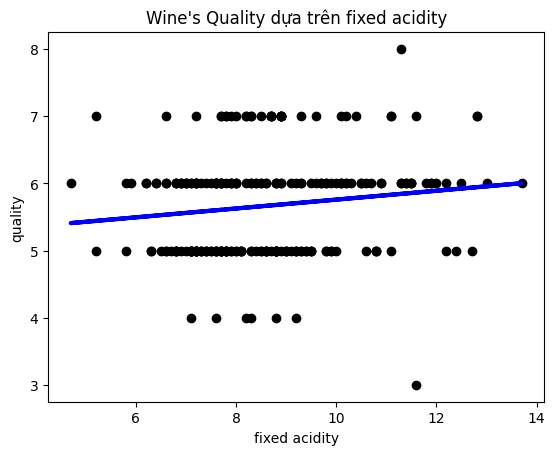

-----------Feature: volatile acidity----------
Intercept (b): 6.555154085276428
Coefficient: volatile acidity (x1): -1.7116346868914007

== R^2 Adjusted Score: 0.1585824964792616
== Mean Squared Error: 0.5037709812538902


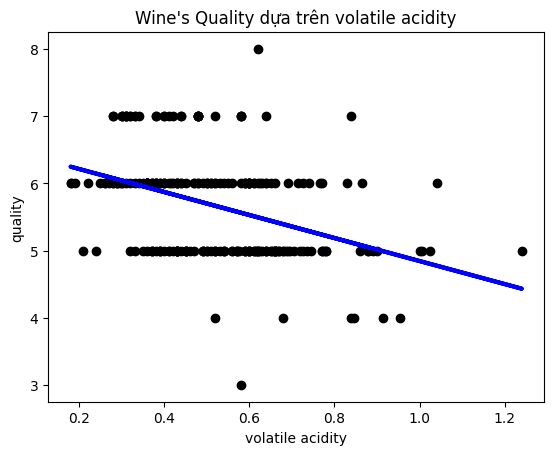

-----------Feature: citric acid----------
Intercept (b): 5.380873466811746
Coefficient: citric acid (x1): 0.9783226340759015

== R^2 Adjusted Score: 0.03844760432884953
== Mean Squared Error: 0.5756977860187161


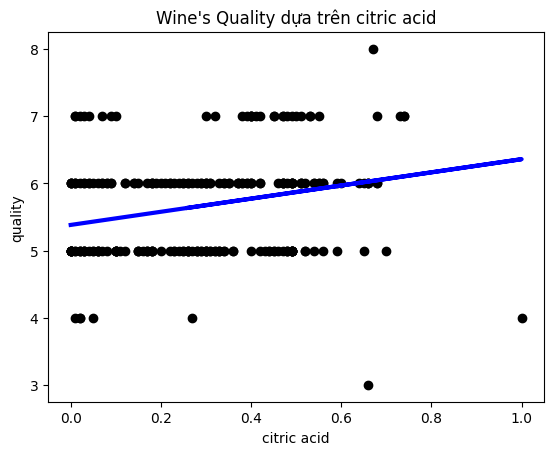

-----------Feature: residual sugar----------
Intercept (b): 5.6165811940377
Coefficient: residual sugar (x1): 0.019889170887420704

== R^2 Adjusted Score: 0.002504378760446624
== Mean Squared Error: 0.5972176069616589


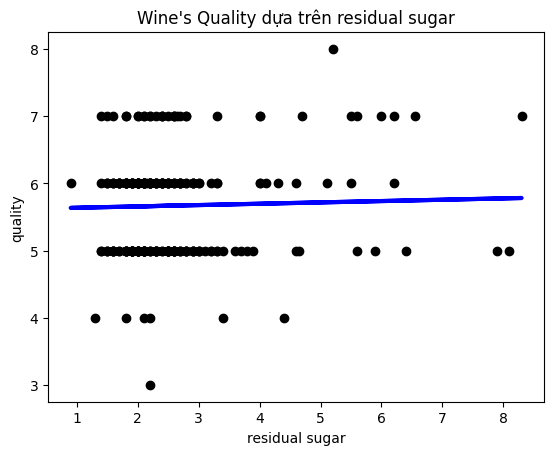

-----------Feature: chlorides----------
Intercept (b): 5.841430378691527
Coefficient: chlorides (x1): -1.9469755089886291

== R^2 Adjusted Score: 0.019957526399733583
== Mean Squared Error: 0.5867681103973224


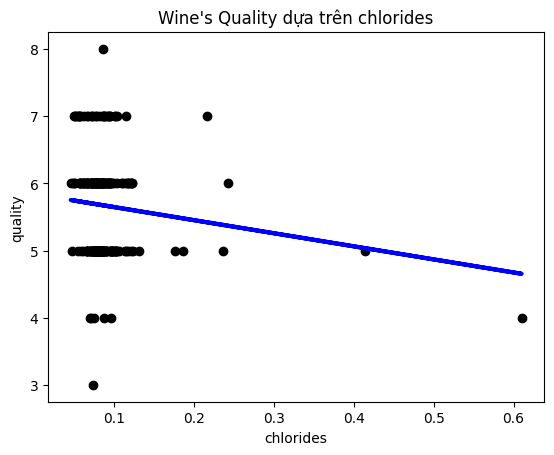

-----------Feature: free sulfur dioxide----------
Intercept (b): 5.75908929407014
Coefficient: free sulfur dioxide (x1): -0.006092293996347475

== R^2 Adjusted Score: 0.0013314780714531738
== Mean Squared Error: 0.5979198425682812


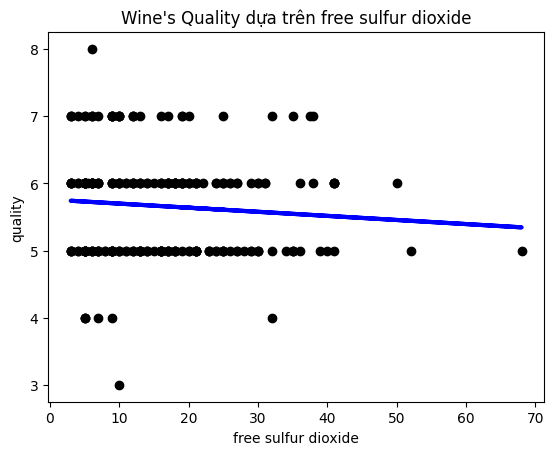

-----------Feature: total sulfur dioxide----------
Intercept (b): 5.931356094173115
Coefficient: total sulfur dioxide (x1): -0.0057017813231839964

== R^2 Adjusted Score: 0.03715762717144944
== Mean Squared Error: 0.5764701172997501


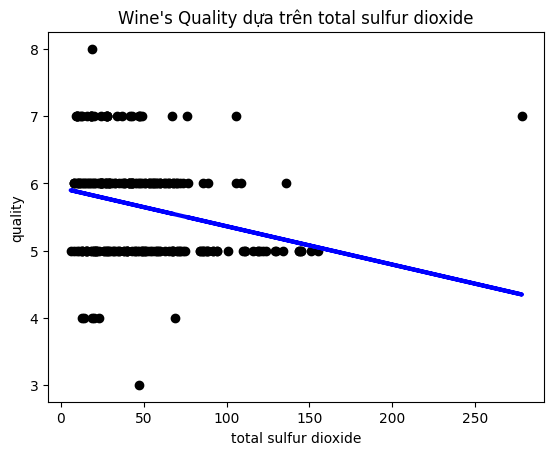

-----------Feature: density----------
Intercept (b): 85.1560281298589
Coefficient: density (x1): -79.7225426400546

== R^2 Adjusted Score: 0.04361841432248559
== Mean Squared Error: 0.5726019340623784


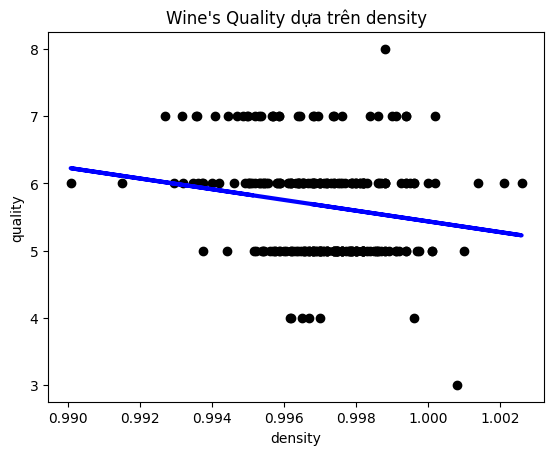

-----------Feature: pH----------
Intercept (b): 7.102799802913069
Coefficient: pH (x1): -0.4352452623937779

== R^2 Adjusted Score: -0.005009557150011057
== Mean Squared Error: 0.6017163282871023


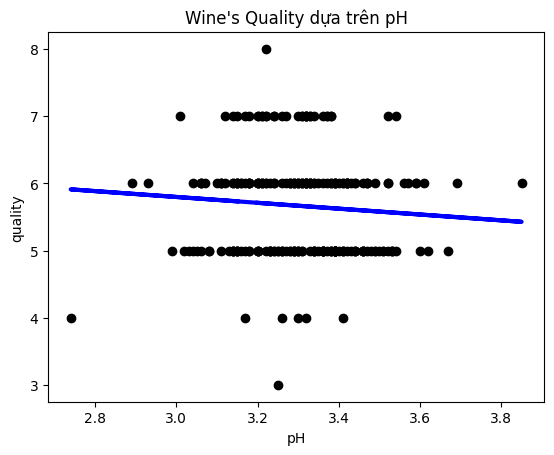

-----------Feature: sulphates----------
Intercept (b): 4.912606708076595
Coefficient: sulphates (x1): 1.1324042788487532

== R^2 Adjusted Score: -0.015865101670378134
== Mean Squared Error: 0.6082157275653297


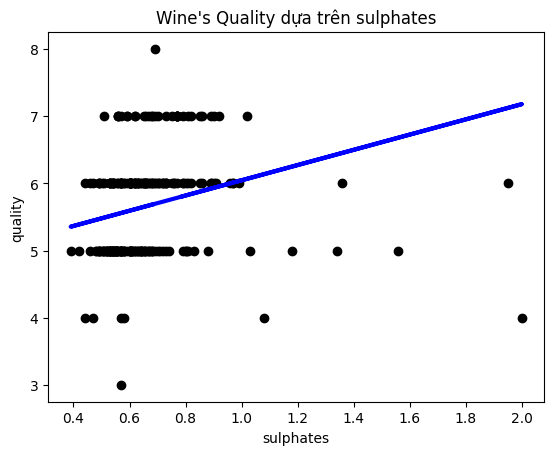

-----------Feature: alcohol----------
Intercept (b): 1.897922283403659
Coefficient: alcohol (x1): 0.3636420137429468

== R^2 Adjusted Score: 0.33075943629051874
== Mean Squared Error: 0.4006857167388632


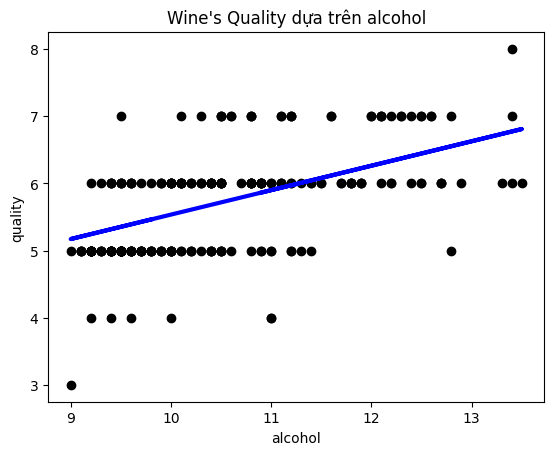

Intercept: alcohol (b): 1.897922283403659
Coefficient: alcohol (x1): 0.3636420137429468

== Best feature: alcohol
== Best R^2 Adjusted Score: 0.33075943629051874
== Best Mean Squared Error: 0.4006857167388632


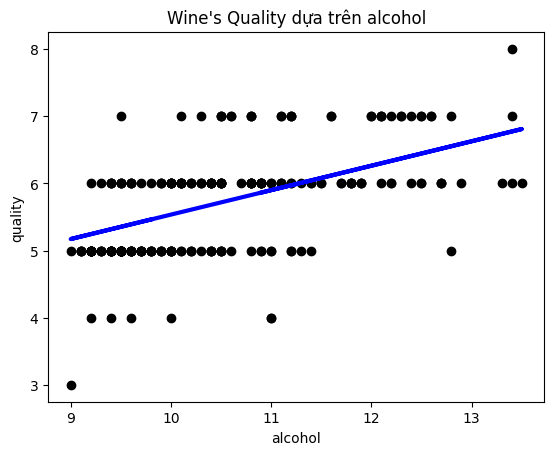


c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất:
Intercept (b): 4.132249481725454
Coefficient: alcohol (x1): 0.31555955876311703
Coefficient: volatile acidity (x2): -1.0112275901431733
Coefficient: chlorides (x3): -1.704039481166589
Coefficient: sulphates (x4): 0.7513565719967907
Coefficient: density (x5): -0.4729672615831504

== Best features: ['alcohol', 'volatile acidity', 'chlorides', 'sulphates', 'density']
== Best Mean Squared Error: 0.35217132335009776


In [21]:
import matplotlib.pyplot as plt

def main():   
    # Đánh giá mô hình
    # TRONG ĐÓ:
        # Mean Squared Error (MSE) là giá trị trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán.
            # Với n là số lượng mẫu, y là giá trị thực tế, y_pred là giá trị dự đoán.
            # MSE càng nhỏ thì mô hình càng tốt (sai số càng nhỏ).
        # R^2 Adjusted Score là tỉ lệ giải thích phương sai của mô hình so với tổng phương sai của dữ liệu.
            # R^2 càng gần 1 thì mô hình càng tốt.    
    
    # Chia dữ liệu thành X và y
    X = df.drop('quality', axis=1)
    y = df['quality']

    # a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.
    print("a. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp:")

    # Xây dựng mô hình với toàn bộ đặc trưng 
    model = LinearRegressionModel()
    model.fit(X, y)

    # In ra các hệ số hồi quy
    print("Intercept (b):", model.intercept_) # Hệ số tự do
    for i, col in enumerate(X.columns):
        print(f"Coefficient của feature {col} (x{i+1}): {model.coef_[i]}")

    # Xây dựng mô hình với tập train và test
    model = LinearRegressionModel()
    model.fit(X_train, y_train) 

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    print()
    # In ra kết quả
    mse = model.MSE(y_test, y_pred)
    r2_adj = model.R2_adjusted(y_test, y_pred, X_test)
    print("== Mean Squared Error:", mse)
    print("== R^2 Adjusted Score:", r2_adj)
    
    print()
    # b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.
    print("b. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất:")
    # Tìm đặc trưng tốt nhất bằng kết quả tốt nhất (tương tự như forward selection)
    best_feature = None
    best_score = -1

    for column in X_train.columns:
        model_single = LinearRegressionModel()
        model_single.fit(X_train[[column]], y_train)
        
        y_pred_single = model_single.predict(X_test[[column]])
        score = model_single.R2_adjusted(y_test, y_pred_single, X_test[[column]])
        
        # In hệ số hồi quy từng feature
        print(f"-----------Feature: {column}----------")
        print("Intercept (b):", model_single.intercept_)
        print(f"Coefficient: {column} (x1): {model_single.coef_[0]}")
        
        print()
        # In ra kết quả
        print(f"== R^2 Adjusted Score: {score}")
        print(f"== Mean Squared Error: {model_single.MSE(y_test, y_pred_single)}")
        
        plt.title(f"Wine's Quality dựa trên {column}") 
        plt.scatter(X_test[column], y_test, color='black') # Điểm thực tế
        plt.plot(X_test[column], y_pred_single, color='blue', linewidth=3) # Đường dự đoán 
        plt.xlabel(column)
        plt.ylabel('quality')
        plt.show()
        
        if score > best_score:
            best_score = score
            best_feature = column

    # In hệ số hồi quy của feature tốt nhất
    print(f"Intercept: {best_feature} (b):", model_single.intercept_)
    print(f"Coefficient: {best_feature} (x1): {model_single.coef_[0]}")

    print()    
    # In ra kết quả
    print("== Best feature:", best_feature)
    print("== Best R^2 Adjusted Score:", best_score) 
    print("== Best Mean Squared Error:", model_single.MSE(y_test, y_pred_single))

    # Vẽ biểu đồ chất lượng của rượu scale như thế nào so với đặc trưng tốt nhất (scale: hồi quy tuyến tính)
    plt.title(f"Wine's Quality dựa trên {best_feature}") 
    plt.scatter(X_test[best_feature], y_test, color='black') # Điểm thực tế
    plt.plot(X_test[best_feature], y_pred_single, color='blue', linewidth=3) # Đường dự đoán 
    plt.xlabel(best_feature)
    plt.ylabel('quality')
    plt.show()
    
    print()
    # c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất. 
    print("c. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất:")
    # Có 2 phương pháp chính: Backward elimination hoặc Forward selection (ở đây chọn Forward selection)
    # Sử dụng số MSE để đánh giá mô hình

    # Tìm tổ hợp đặc trưng tốt nhất
    best_model = LinearRegressionModel()
    best_model, best_features, best_mse = best_model.forward_selection(X_train, y_train, X_test, y_test)
    
    # In ra các hệ số hồi quy     
    print("Intercept (b):", best_model.intercept_)
    for i, feature in enumerate(best_features):
        print(f"Coefficient: {feature} (x{i+1}): {best_model.coef_[i]}")
    
    print()
    # In ra kết quả
    print("== Best features:", best_features)
    print("== Best Mean Squared Error:", best_mse)
    
if __name__ == "__main__":
    main()

# == PHƯƠNG PHÁP ĐÁNH GIÁ MODEL ==
### Mean Squared Error (MSE):
- Ý nghĩa:
    + Mean Squared Error (MSE) là giá trị trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán. 
    + Trong bài toán chất lượng rượu vang, thông số này sẽ tương ứng với độ lệch giữa giá trị `quality` dự đoán được từ các từ mô hình và giá trị thực tế trích được từ hệ số hồi quy.
> **→ Chỉ số MSE càng nhỏ thì mô hình càng tốt (sai số càng nhỏ).**
- Công thức:
$$MSE = \frac{1}{n} \times \sum_{i=1}^n (Y_i - \hat{Y}_i)$$
- Trong đó:
    + $n$: Số lượng mẫu.
    + $Y_i$: `y_true` (giá trị thực tế của biến phụ thuộc).
    + $\hat{Y}_i$: `y_pred` (giá trị dự đoán của biến phụ thuộc)

### $R^2$ Adjusted Score (coefficient of determination):
#### Ý nghĩa của **$R^2$**:
- $R^2$ Score (Hệ số xác định) là một chỉ số thống kê cho biết mức độ phù hợp của mô hình hồi quy tuyến tính. Nó biểu thị tỷ lệ phương sai của biến mục tiêu được giải thích bởi các đặc trưng trong mô hình. → $R^2$ không giảm khi thêm biến độc lập mới.
- Trong bài toán chất lượng rượu vang, $R^2$ Score cho biết tỷ lệ phương sai của biến mục tiêu (`quality`) được giải thích bởi các biến độc lập (11 feature của rượu vang). $R^2$ dao động từ $0→1$:
> **→ $R^2=1$: Tất cả phương sai của biến mục tiêu được giải thích bởi các biến độc lập (mô hình hoàn hảo).** <br>
> **→ $R^2=0$: Mô hình không giải thích được bất kỳ phương sai nào của biến mục tiêu (tệ nhất).**
- **TUY NHIÊN**: Khi thêm biến độc lập vào mô hình, $R^2$ có xu hướng tăng, ngay cả khi biến đó không thực sự cải thiện mô hình. Điều này dẫn đến một vấn đề gọi là ***overfitting*** (mô hình trở nên quá phức tạp và hoạt động kém trên dữ liệu mới). Cũng chính vì hạn chế này mà ta sẽ sử dụng **$R^2$ Adjusted** cho dự đoán chất lượng rượu vang.

#### Ý nghĩa của **$R^2$ Adjusted**: 
- $R^2$ Adjusted là một phiên bản điều chỉnh của $R^2$ để tính đến số lượng biến độc lập (features) trong mô hình hồi quy.
- $R^2$ Adjusted chỉ tăng khi biến mới thực sự cải thiện mô hình, tức là làm giảm sai số dự đoán của mô hình nhiều hơn so với mức mà bạn mong đợi từ việc tăng thêm biến đó chỉ do ngẫu nhiên.
Nếu thêm vào một biến mà không cải thiện hoặc thậm chí làm giảm chất lượng mô hình, $R^2$ Adjusted sẽ giảm, giúp phát hiện rằng biến đó không hữu ích.
→  $R^2$ Adjusted có thể giảm nếu biến mới không thực sự giúp ích cho mô hình.

#### Sử dụng $R^2$ Adjusted thay vì $R^2$ trong mô hình hồi quy tuyến tính là hợp lý hơn vì các lý do sau:
1. So Sánh Giữa Các Mô Hình Khác Nhau:
    + Khi xây dựng và so sánh nhiều mô hình với các số lượng đặc trưng khác nhau, $R^2$ Adjusted là một thước đo tốt hơn để so sánh vì nó cung cấp một cái nhìn công bằng hơn về hiệu suất của các mô hình.
    + $R^2$ Adjusted cho phép đánh giá xem liệu việc thêm các đặc trưng mới vào mô hình có thực sự cải thiện khả năng dự đoán hay không, thay vì chỉ tạo ra một mô hình phức tạp hơn.
2. Phù Hợp Với Mô Hình Hồi Quy Đa Đặc Trưng:
    + Trong bối cảnh dự đoán chất lượng rượu vang với nhiều đặc trưng (features) khác nhau, mô hình có thể trở nên phức tạp và dễ dẫn đến overfitting nếu không có cách điều chỉnh phù hợp. $R^2$ Adjusted giúp mô hình duy trì sự đơn giản và tránh việc thêm vào các đặc trưng không cần thiết.

- Công thức: 
    + $R^2$: $$R^2 = 1 - \frac{\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^n (Y_i - \={Y}_i)^2} = 1 - \frac{RSS}{TSS} = \frac{ESS}{TSS}$$
    + $R^2$ Adjusted điều chỉnh lại giá trị của $R^2$ để phản ánh đúng hơn giá trị thực của các biến độc lập được thêm vào mô hình: $$R_{adjusted}^2 = 1 - \frac{1 - R^2}{n-K-1} * (n-1)= 1 - \frac{\frac{RSS}{n - K}}{\frac{TSS}{n - 1}}$$

- Trong đó:
    + $n$: Số lượng mẫu.
    + $K$: Số lượng biến độc lập (số feature) trong mô hình.
    + $Y_i$: `y_true` (giá trị thực tế của biến phụ thuộc).
    + $\hat{Y}_i$: `y_pred` (giá trị dự đoán của biến phụ thuộc).
    + $\=Y_i$: `y_true.mean()` (giá trị trung bình của biến phụ thuộc).
- Ngoài ra:
    + ESS: explained sum of squares. $$ESS = \sum_{i=1}^n (\hat{Y}_i - \={Y}_i)^2$$
    + RSS: Tổng bình phương của phần dư (Residual Sum of Squares), tức là tổng bình phương các sai số giữa giá trị thực tế và giá trị dự đoán. $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$$
    + TSS: Tổng bình phương tổng thể (Total Sum of Squares), tức là tổng bình phương các sai số giữa giá trị thực tế và giá trị trung bình của nó. $$TSS = RSS + ESS = \sum_{i=1}^n (Y_i - \={Y}_i)^2$$

# == NHẬN XÉT KẾT QUẢ ==
### 1. Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp.
- Dựa vào công thức hồi quy tuyến tính:
> **quality** = $x_0 + x_1 *$ fixed_acidity $+ x_2 *$ volatile_acidity $+ x_3 *$ citric_acid $+ x_4 *$ residual_sugar $+ x_5 *$ chlorides $+ x_6 *$ free_sulfur_dioxide $+ x_7 *$ total_sulfur_dioxide $+ x_8 *$ density $+ x_9 *$ pH $+ x_{10} *$ sulphates $+ x_{11} *$ alcohol.    
- Ta suy được, feature có coef (hệ số hồi quy) càng lớn thì mối tương quan với `quality` (chất lượng rượu) càng cao.

#### Các thông số hồi quy tuyến tính: Intercept và Coefficients biểu thị mối quan hệ tuyến tính giữa 11 đặc tính khác nhau và chất lượng rượu.
- Intercept (bias): 42.91716244349152
    + Ý nghĩa: Intercept là giá trị của biến mục tiêu (`quality`) khi tất cả các đặc trưng (features) có giá trị bằng 0. Trong bối cảnh này, nếu tất cả các đặc trưng của rượu vang bằng 0 (điều này không thực tế trong thực tế), thì chất lượng của rượu sẽ là 42.917 (một giá trị lý thuyết).

- Hệ số hồi quy, trong đó có 2 hệ số nổi bật:
    + Coefficient của feature density (x8): -39.46908102891956
        + Ý nghĩa: Khi giữ các đặc trưng khác không đổi, nếu `density` tăng lên 1 đơn vị, chất lượng rượu sẽ **giảm** đi khoảng 39.469 điểm.
    + Coefficient của feature sulphates (x10): 0.7738407942726112
        + Ý nghĩa: Khi giữ các đặc trưng khác không đổi, nếu `sulphates` tăng lên 1 đơn vị, chất lượng rượu sẽ **tăng** lên khoảng 0.774 điểm.
>- Nếu xét tất cả 11 đặc tính làm nên chất lượng của rượu vang:
>   + Đặc tính `density` (độ đặc của chất lỏng) nếu gia tăng sẽ làm giảm chất lượng rượu nhiều nhất so với các đặc tính khác → Nên tránh làm tăng `density` của rượu. <br>
>   + Đặc tính `sulphates` (nồng độ sun-phát) nếu gia tăng sẽ giúp tăng chất lượng rượu nhiều nhất so với các đặc tính khác → Nên tăng nồng độ `sulphates` của rượu.

#### Các Thông Số Đánh Giá Mô Hình:
- Mean Squared Error: 0.3542580783652169
    + Ý nghĩa: 
        + Trung bình bình phương của sai số dự đoán là khoảng 0.354. Vì sai số là bình phương nên luôn $> 0$, và được tính toán trên cùng đơn vị với giá trị đầu ra (trong trường hợp này là điểm số chất lượng rượu vang).
        + Trong bối cảnh chất lượng rượu vang, chất lượng rượu được đánh giá trên thang điểm từ 1 đến 10. MSE = 0.354 là khá nhỏ so với khoảng giá trị của biến mục tiêu, chỉ ra rằng mô hình có khả năng dự đoán tương đối chính xác.
- $R^2$ Adjusted Score: 0.3823530978472638
    + Ý nghĩa: 
        + Giá trị này có nghĩa là khoảng 38.28% của sự biến động trong chất lượng rượu vang có thể được giải thích bởi 11 đặc trưng trong mô hình. 
        + Điều này cũng có nghĩa là có 61.72% sự biến động trong chất lượng rượu vang không được giải thích bởi mô hình và có thể do các yếu tố khác không được đưa vào mô hình.
> Dựa trên 2 số liệu vừa đưa ra, mô hình hồi quy tuyến tính dự đoán chất lượng rượu vang sử dụng 11 đặc tính tương đối tốt với sai số nhỏ, tuy vậy khả năng giải thích của model dựa trên toàn bộ feature là còn hạn chế (dưới $50%$). Đây có thể là do sự thiếu hụt trong việc **stratify** data,... 

#### Biểu đồ
- Vì có 11 hệ số hồi quy tương đương với không gian plot cần có 11 chiều → **Không khả thi**

### 2. Sử dụng duy nhất 1 đặc trưng cho kết quả tốt nhất.
- Thông qua việc thử từng feature trong 11 feature và xây model riêng, ta thấy được mô hình cho kết quả tốt nhất là của feature `alcohol` với các thông số $MSE$ và $R^2$ gần với khi sử dụng cả 11 feature:
    + $R^2$ Adjusted Score: 0.33075943629051874
        + Khi so giá trị này với 10 feature còn lại, ta có thể thấy rằng Score này cao hơn hẳn, vì vậy có thể nói rằng `alcohol` thực sự có ảnh hưởng tốt tới chất lượng của rượu vang.
    + Mean Squared Error: 0.4006857167388632
        + Tương tự, MSE = 0.4 là khá nhỏ so với khoảng giá trị của biến mục tiêu (chỉ lệch 0.05 so với khi sử dụng toàn bộ feature), chỉ ra rằng mô hình có khả năng dự đoán tương đối chính xác.

#### `alcohol` so với `sulphates`:
- Kết quả hệ số hồi quy `alcohol`:
    + Intercept: alcohol (b): 1.897922283403659
    + Coefficient: alcohol (x1): 0.3636420137429468
- Kết quả hệ số hồi quy `sulphates`:
    + Intercept (b): 4.912606708076595
    + Coefficient: sulphates (x1): 1.1324042788487532

>- Mặc dù có hệ số coefficient cao hơn nhiều so với `alcohol`, `sulphates` lại có chỉ số MSE và $R^2$ thấp hơn hẳn ($R^2$ Adjusted: -0.015865101670378134 và MSE: 0.6082157275653297). Lý do có thể là vì hệ số hồi quy (coefficient) cho biết ảnh hưởng của một đặc trưng đơn lẻ đến giá trị dự đoán, nhưng không phản ánh tầm quan trọng của đặc trưng đó khi các đặc trưng khác cũng được đưa vào mô hình.

#### Biểu đồ
- Biểu đồ scatter plot của từng feature được chọn ảnh hưởng với chất lượng rượu, cùng với đường hồi quy:
    + Các chấm đen biểu thị điểm chất lượng thực tế.
    + Đường xanh dường là đường hồi quy dự đoán giá trị rượu dựa trên giá trị feature.

### 3. Xây dựng một mô hình của riêng bạn cho kết quả tốt nhất.
- Sử dụng phương pháp chọn lựa đặc trưng Forward Selection để tìm ra các đặc trưng tốt nhất. Các đặc trưng được chọn là: `alcohol`, `volatile acidity`, `chlorides`, `sulphates`, `density`.
- Trong đó: alcohol được chọn làm feature đầu tiên vì là best feature khi được sử dụng riêng để xây model, các feature còn lại được chọn dựa theo quy trình của Forward Selection.
- Tổ hợp các feature này có thể thay đổi khi `random_state` thay đổi như đã đề cập ở ban đầu.
- Vì là mô hình 5 có hệ số hồi quy nên không gian plot cần có 5 chiều → **Không khả thi**

## **TỔNG KẾT**:
> → Khi dự đoán chất lượng rượu, nếu chỉ được chọn duy nhất 1 đặc trưng, `alcohol` là đặc trưng có ảnh hưởng rõ rệt nhất đến chất lượng rượu theo mô hình hồi quy tuyến tính. Tuy nhiên, việc sử dụng một mô hình với các feature được chọn lọc qua phương pháp Forward Selection cho kết quả tốt hơn với MSE thấp hơn và có khả năng giải thích tốt hơn sự biến động của chất lượng rượu. Do đó, việc lựa chọn và kết hợp các đặc trưng phù hợp là rất quan trọng để cải thiện hiệu quả của mô hình dự đoán chất lượng rượu. <br>
> → Nếu có thể, vẫn nên sử dụng toàn bộ feature được cung cấp (nếu không có lỗi data ảnh hưởng tới kết quả) để có một mô hình hồi quy tuyến tính khách quan và chính xác nhất.

# == REFERENCES ==
### Lý thuyết:
- Why do we need data splitting? - https://www.linkedin.com/pulse/why-do-we-need-data-splitting-utkarsh-sharma/
- Why 70/30 or 80/20 Relation Between Training and Testing Sets: A Pedagogical Explanation - https://typeset.io/papers/why-70-30-or-80-20-relation-between-training-and-testing-4qqruorjip
- Forward Selection: A Powerful Feature Selection Technique for Optimal Model Building - https://www.linkedin.com/pulse/forward-selection-powerful-feature-technique-optimal-model-ravi-singh/
- How To Interpret R-squared in Regression Analysis - https://statisticsbyjim.com/regression/interpret-r-squared-regression/
- R-squared, Adjusted R-squared and Pseudo-R-squared - https://timeseriesreasoning.com/contents/r-squared-adjusted-r-squared-pseudo-r-squared/
- Interpreting the adjusted R2 - https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_interpreting_the_adjusted_r2.htm
- mean squared error - Ken Stewart - https://www.britannica.com/science/mean-squared-error
- Mean Squared Error (MSE) - https://statisticsbyjim.com/regression/mean-squared-error-mse/
- Forward Feature Selection in Machine Learning: A Comprehensive Guide - https://www.analyticsvidhya.com/blog/2021/04/forward-feature-selection-and-its-implementation/#:~:text=Forward%20Feature%20Selection%20is%20a,a%20stopping%20criterion%20is%20met.

### Kỹ thuật lập trình:
- How to split data into training and testing in Python without sklearn - https://www.geeksforgeeks.org/how-to-split-data-into-training-and-testing-in-python-without-sklearn/
- Sum Value of Array using zip() - https://stackoverflow.com/questions/22975532/sum-values-of-array-using-zip